# Grid & Hexbins Map

In [1]:
import os
os.environ['HTTP_PROXY']=""
os.environ['HTTPS_PROXY']=""

In [2]:
import geopandas as gpd

file = 'https://opendata.arcgis.com/datasets/74f80b70093143baa8fe6a7fff965ffd_0.zip'
gdf_framacia = gpd.read_file(file)
gdf_framacia.head()

,FID,OID_,TIPOCEN2,TIPOVIAL,NOMVIA,NUMERO,MUNICIPIO,CODMUN,UTM_X,UTM_Y,geometry
0,1,2,Centro de Salud Carmen Calzado,Calle,Carmen Calzado,None,Alcal1 de Henares,005,468979,4481282,POINT (-3.36600 40.48165)
1,2,8,Centro de Salud Juan de Austria,Avenida,Juan de Austria,None,Alcal1 de Henares,005,470297,4481952,POINT (-3.35048 40.48773)
2,3,9,Centro de Salud La Garena,Calle,Arturo Soria,None,Alcal1 de Henares,005,466688,4481291,POINT (-3.39303 40.48164)
3,4,6,Centro de Salud Luis Vives I y II,Calle,Luis Vives,None,Alcal1 de Henares,005,468796,4480551,POINT (-3.36812 40.47506)
4,5,5,Centro de Salud Manuel Merino,Calle,Manuel Merino,None,Alcal de Henares,005,469712,4481336,POINT (-3.35735 40.48216)


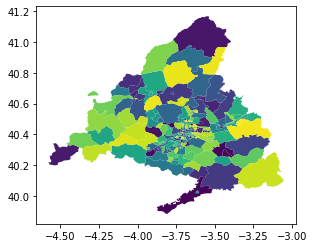

In [3]:
file2 = 'https://opendata.arcgis.com/datasets/55e1ad5d44d8473eb8c215d86ed8044a_0.zip'
zonas_salud = gpd.read_file(file2)
zonas_salud.plot(column="CDID")
#zonas_salud.head()

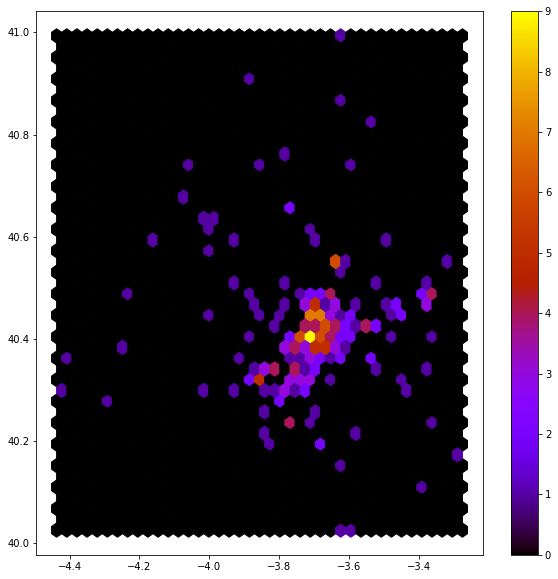

In [4]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(10, 10))
hb = ax.hexbin(gdf_framacia.geometry.x, gdf_framacia.geometry.y, gridsize=40, cmap='gnuplot')
plt.colorbar(hb)

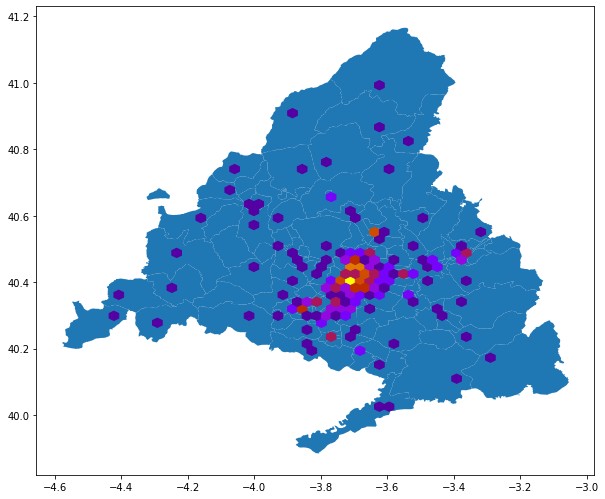

In [5]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
zonas_salud.plot(ax=ax)
hb = ax.hexbin(gdf_framacia.geometry.x, gdf_framacia.geometry.y, gridsize=40, cmap='gnuplot')
ax.figure.canvas.draw()
counts = hb.get_array()
colors = hb.get_facecolors()
colors[:, 3] = counts > 0
hb.set_facecolors(colors)